<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# Install required libraries.

%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
# Dataset URL from the GenAI lab.
# Use the URL provided in the GenAI lab in the cell below.

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# Downloading the dataset
# Execute the following code to download the dataset in to the interface.

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [22]:
# Reading the data set and generating the statistical description.

## Write a python code to perform the following actions.
## 1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
## 2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.

import pandas as pd

# Step 1: Import data from CSV
data = pd.read_csv('dataset.csv')
    
# Step 2: Generate statistical description
stats = data.describe(include = 'all')  # 'all' includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns 
                                      # Also displays count for 'object' (categorical) columns
    
# Print the statistical descriptions
print("Statistical description of the dataset:")
print(stats)
    
# For clarity, let's separate numeric and object type stats
print("\nNumeric Type Statistics:")
print(stats.loc[stats.index.str.isnumeric(), :])  # Filter only numeric columns
    
print("\nObject Type Statistics:")
print(stats.loc[~stats.index.str.isnumeric(), :])  # Filter only object (categorical) columns


# Example usage:
# Assuming the path to your CSV file is '/path/to/your/dataset.csv'
# file_path = '/path/to/your/dataset.csv'
# generate_stats(file_path)

Statistical description of the dataset:
        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
coun

In [16]:
# Reading the data set and generating the statistical description.

## Write a python code to perform the following actions.
## 1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
## 2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.

import pandas as pd

# 1. Import a data set from a CSV file
data = pd.read_csv('dataset.csv')

# 2. Generate the statistical description of all the features
description = data.describe(include = 'all')

print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

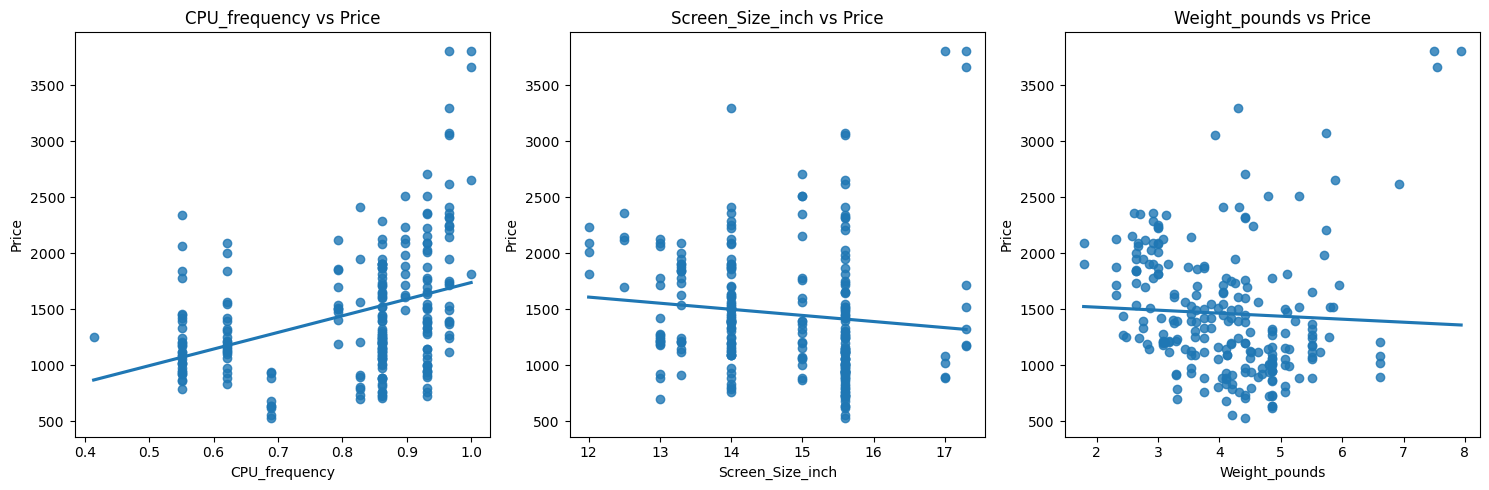

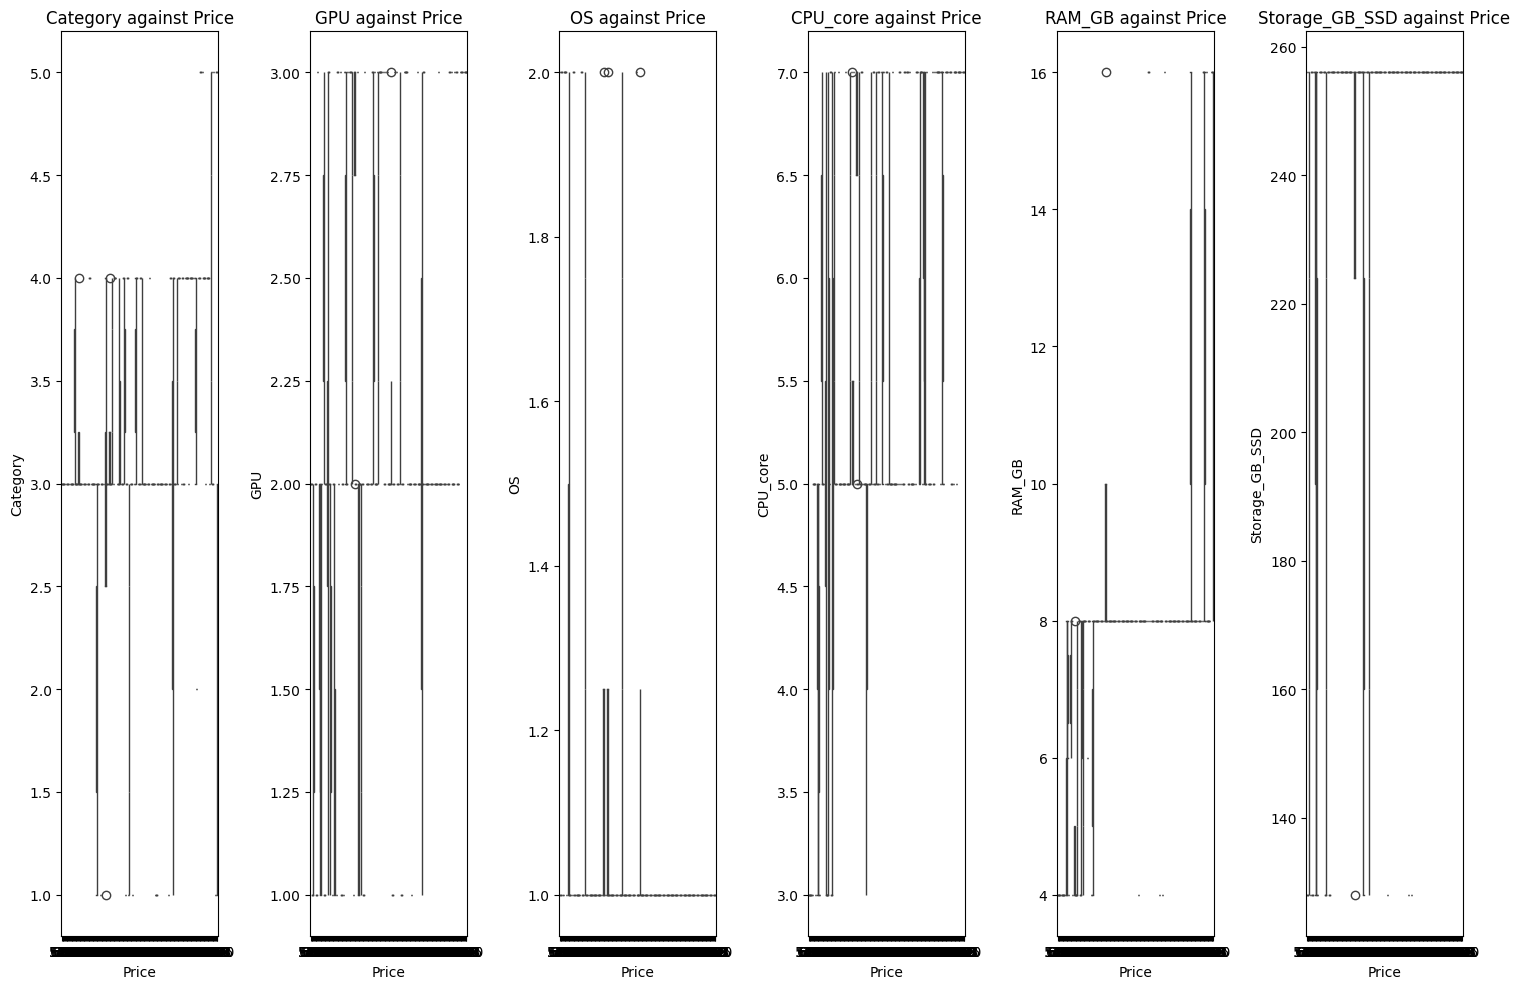

In [25]:
# Creating parameter visualizations.
# Next, you decided that you need to see the distribution of various attributes against the target attribute. The target attribute, in this case, is Price. 

## Write a Python code to perform the following actions.
## 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
## 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')
    
# Regression Plots
regression_features = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
    
fig, axes = plt.subplots(1, len(regression_features), figsize = (15, 5))
    
for ax, feature in zip(axes, regression_features):
    sns.regplot(x = feature, y = 'Price', data = df, ax = ax, ci = None)
    ax.set_title(f'{feature} vs Price') 
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    
plt.tight_layout()
plt.show()

# Box Plots
boxplot_features = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
    
fig, axes = plt.subplots(nrows = 1, ncols = len(boxplot_features), figsize = (15, 10))
    
for ax, feature in zip(axes.flatten(), boxplot_features):
    sns.boxplot(x = 'Price', y = feature, data = df, ax = ax)
    ax.set_title(f'{feature} against Price')
    ax.set_xlabel('Price')
    ax.set_ylabel(feature)
    
plt.tight_layout()
plt.show()


# Example usage:
# Ensure the path to your CSV file is correct
# file_path = 'path/to/your/dataset.csv'
# plot_regression_and_box(file_path)

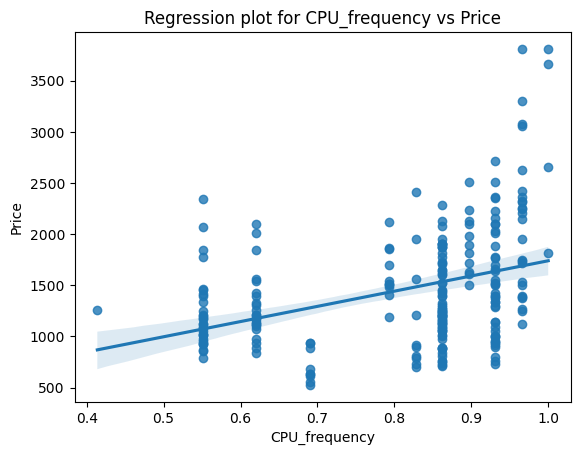

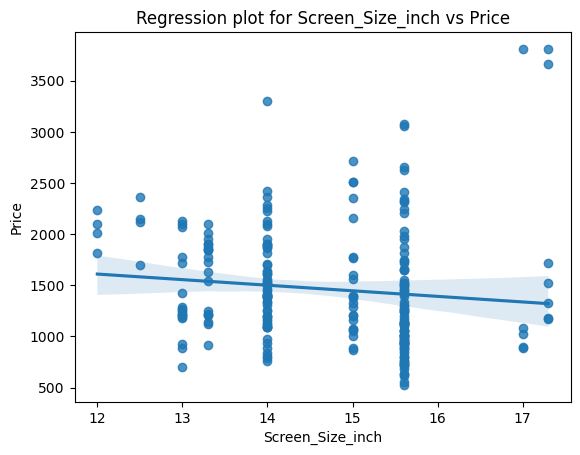

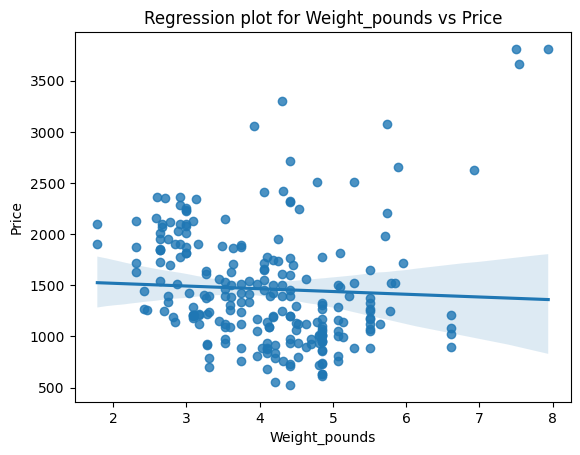

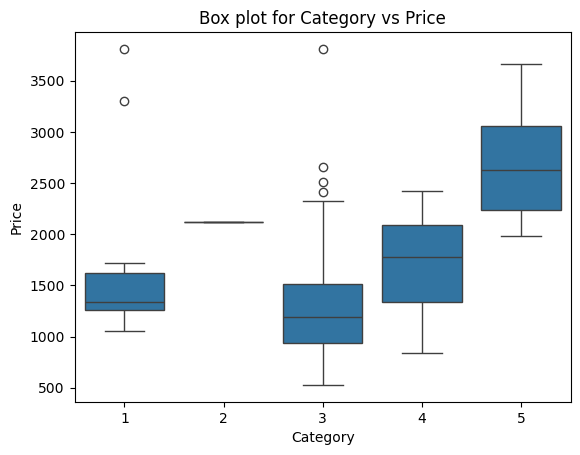

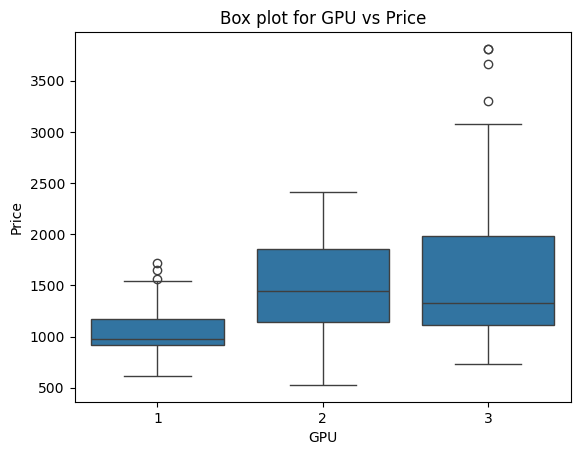

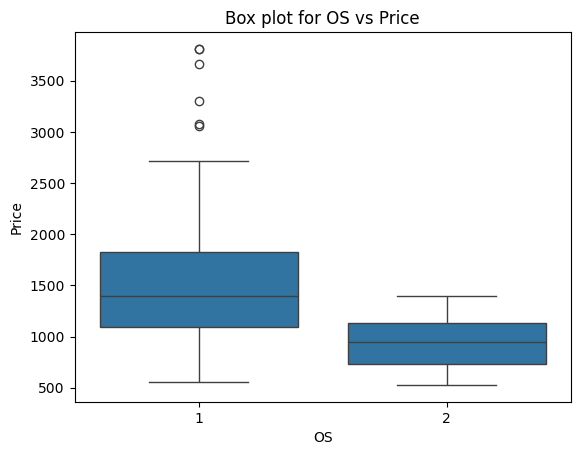

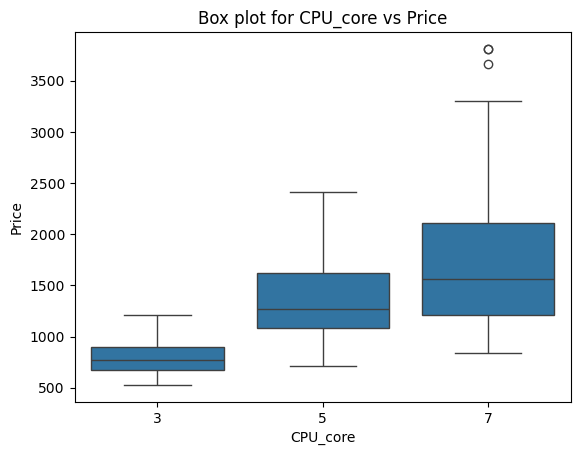

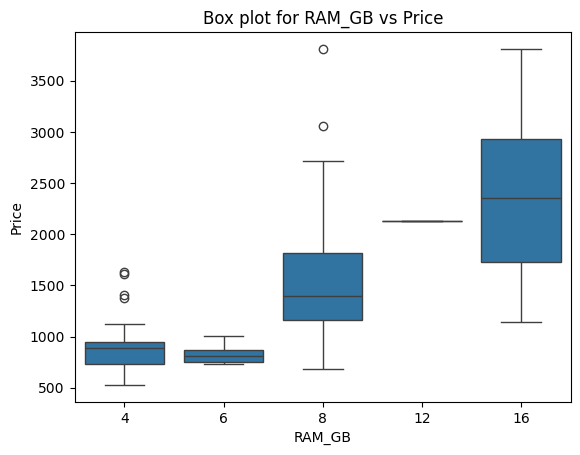

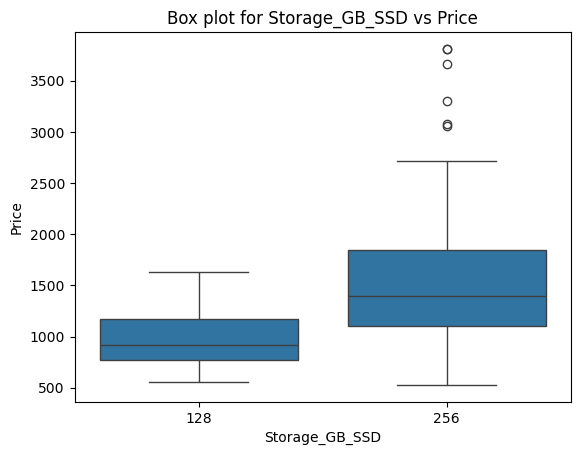

In [17]:
# Creating parameter visualizations.
# Next, you decided that you need to see the distribution of various attributes against the target attribute. The target attribute, in this case, is Price. 

## Write a Python code to perform the following actions.
## 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
## 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
data = pd.read_csv('dataset.csv')

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x = attribute, y = 'Price', data = data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x = attribute, y = 'Price', data = data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [21]:
# Evaluate dependence.
# Usually, not all parameters in a data set have a direct or strong level of influence on the target variable.
# The level of influence is especially important for data scientists because the design of predictive models uses variables that affect the target variable the most.

## Write a Python code for the following.
## 1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
## 2. Don't include the values evaluated for target variable against itself.
## 3. Print these values as a part of a single dataframe against each individual attribute.

import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('dataset.csv')
    
# Step 2: Filter only numerical columns excluding 'Price'
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
numerical_cols = numerical_cols.difference(['Price'])
    
# Initialize an empty list to collect results
correlation_results = []
    
# Step 3: Calculate correlation for each numerical feature against 'Price'
for col in numerical_cols:
    corr, p_value = pearsonr(df[col], df['Price'])
    r_val = corr**2  # r^2 value
    correlation_results.append((col, corr, p_value, r_val))
    
# Convert results to DataFrame for better readability
result_df = pd.DataFrame(correlation_results, columns = ['Attribute', 'Pearson Correlation', 'P-value', 'r^2 Value'])
print("Correlation Results:")
print(result_df)


# Example usage:
# Replace 'path/to/your/dataset.csv' with your actual path
# file_path = 'path/to/your/dataset.csv'
# evaluate_numerical_correlation(file_path)

Correlation Results:
           Attribute  Pearson Correlation       P-value  r^2 Value
0           CPU_core             0.459398  7.912950e-14   0.211046
1      CPU_frequency             0.366666  5.502463e-09   0.134444
2           Category             0.286243  7.225696e-06   0.081935
3                GPU             0.288298  6.166950e-06   0.083116
4                 OS            -0.221730  5.696643e-04   0.049164
5             RAM_GB             0.549297  3.681561e-20   0.301728
6     Screen-Full_HD            -0.021075  7.463568e-01   0.000444
7   Screen-IPS_panel             0.021075  7.463568e-01   0.000444
8   Screen_Size_inch            -0.110644  8.853398e-02   0.012242
9     Storage_GB_SSD             0.243421  1.489892e-04   0.059254
10        Unnamed: 0             0.321933  3.851058e-07   0.103641
11      Unnamed: 0.1             0.321933  3.851058e-07   0.103641
12     Weight_pounds            -0.050312  4.397694e-01   0.002531


In [27]:
# Evaluate dependence.
# Usually, not all parameters in a data set have a direct or strong level of influence on the target variable.
# The level of influence is especially important for data scientists because the design of predictive models uses variables that affect the target variable the most.

## Write a Python code for the following.
## 1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
## 2. Don't include the values evaluated for target variable against itself.
## 3. Print these values as a part of a single dataframe against each individual attribute.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

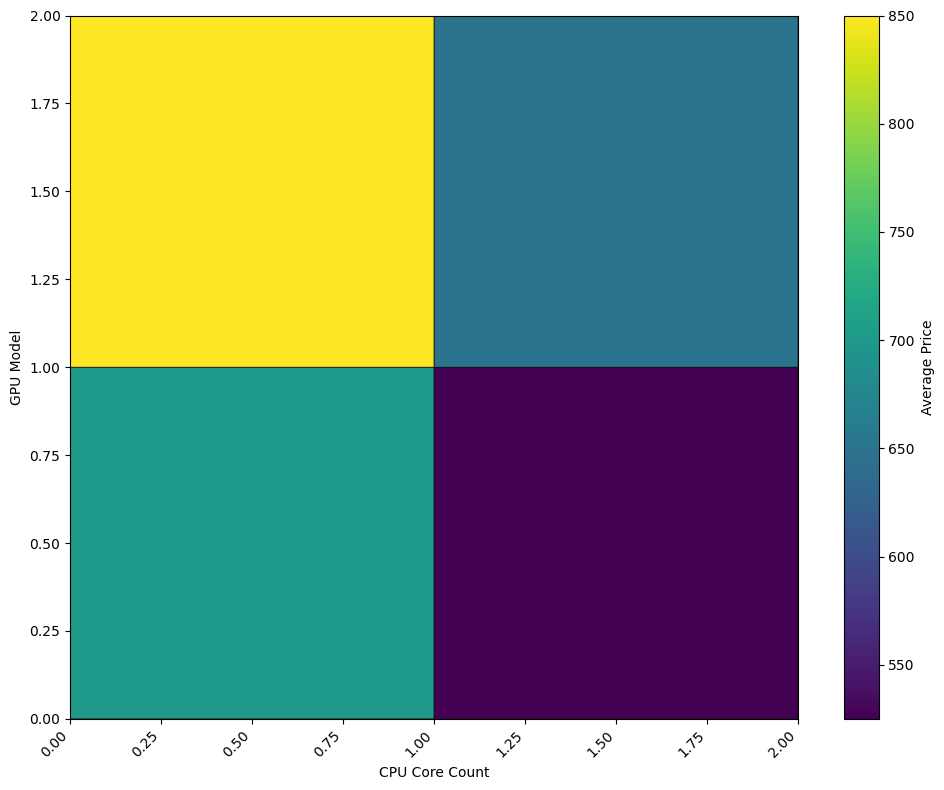

In [28]:
# Grouping and pivots.
# You can perform another form of exploratory data analysis by grouping different variables to create a pivot table, 
# which serves as a matrix of different combinations of values as seen in the grouped variables. 
# The respective value of the matrix is the average of all values of the target attribute that have the same combination. You can view this kind of matrix using a pcolor plot.

## Write a python code that performs the following actions.
## 1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
## 2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
## 3. Plot a pcolor plot for this pivot table.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame creation for demonstration purposes
# In practice, replace this with your actual data
data = {
    'GPU': ['GPU1', 'GPU1', 'GPU2', 'GPU2', 'GPU1', 'GPU2'],
    'CPU_core': ['Quad Core', 'Hex Core', 'Quad Core', 'Hex Core', 'Quad Core', 'Hex Core'],
    'Price': [500, 700, 650, 800, 550, 900]
}

df = pd.DataFrame(data)

# Step 1: Grouping the attributes 'GPU', 'CPU_core', and 'Price'
grouped_df = df[['GPU', 'CPU_core', 'Price']].groupby(['GPU', 'CPU_core']).mean().reset_index()

# Step 2: Creating a pivot table
pivot_table = grouped_df.pivot(index='GPU', columns = 'CPU_core', values = 'Price')

# Step 3: Plotting a pcolor plot
plt.figure(figsize = (10, 8))
plt.pcolor(pivot_table, cmap = 'viridis', edgecolors = 'k', lw = 0.5)

# Adding color bar
plt.colorbar(label = 'Average Price')

# Set axis labels
plt.xlabel('CPU Core Count')
plt.ylabel('GPU Model')

# Rotate xtick labels for better readability
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.tight_layout()
plt.show()

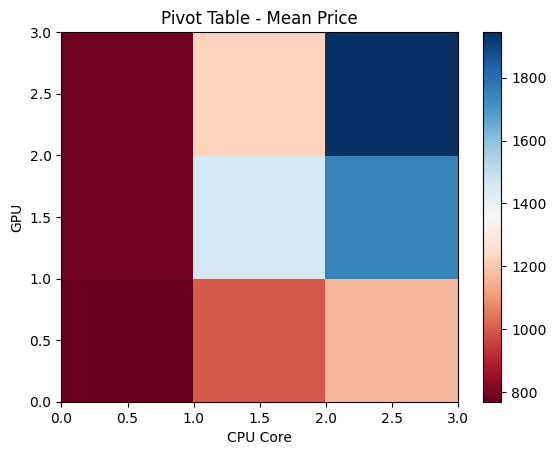

In [29]:
# Grouping and pivots.
# You can perform another form of exploratory data analysis by grouping different variables to create a pivot table, 
# which serves as a matrix of different combinations of values as seen in the grouped variables. 
# The respective value of the matrix is the average of all values of the target attribute that have the same combination. You can view this kind of matrix using a pcolor plot.

## Write a python code that performs the following actions.
## 1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
## 2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
## 3. Plot a pcolor plot for this pivot table.

import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

In [ ]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
